In [24]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
foldX = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage-two/stage_2.4/foldX.tsv', sep='\t', header=0)
sift = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage-two/stage_2.4/sift.tsv', sep='\t', header=0)

In [28]:
foldX.head()

,Protein,Amino_Acid,foldX_Score
0,A5A607,E63D,1.84216
1,A5A607,K60Q,0.51710
2,A5A607,Y56C,0.72870
3,A5A607,Y56S,0.84212
4,P00350,A117S,-0.09854


In [29]:
print(foldX)

      Protein Amino_Acid  foldX_Score
0      A5A607       E63D     1.842160
1      A5A607       K60Q     0.517100
2      A5A607       Y56C     0.728700
3      A5A607       Y56S     0.842120
4      P00350      A117S    -0.098540
...       ...        ...          ...
76570  Q93K97      S190P    -1.778610
76571  Q93K97      T124I    -0.973832
76572  Q93K97       T23I    -0.242378
76573  Q93K97      V145L    -0.249012
76574  Q93K97       V49I    -0.381140

[76575 rows x 3 columns]


In [31]:
# Import both sift and foldx datasets; in both datasets, create a column specific_Protein_aa which will be a cantenation of the Protein and Amino_acid columns such
# that If you have Protein A5A607 and Amino_acid E63D, you have specific_Protein_aa A5A607_E63D

sift["specific_Protein_aa"] = sift["Protein"] + "_" + sift["Amino_Acid"]
foldX["specific_Protein_aa"] = foldX["Protein"] + "_" + foldX["Amino_Acid"]


In [32]:
#3. merge datasets from specific_Protein_aa
merged_df = pd.merge(sift, foldX, on="specific_Protein_aa")
print(merged_df.head())

  Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
0    A5A607         K60Q    0.197799         A5A607_K60Q    A5A607   
1    A5A607         Y56C    0.174970         A5A607_Y56C    A5A607   
2    A5A607         Y56S    0.415581         A5A607_Y56S    A5A607   
3    P00350        A117S    0.401519        P00350_A117S    P00350   
4    P00350        A117T    0.282769        P00350_A117T    P00350   

  Amino_Acid_y  foldX_Score  
0         K60Q      0.51710  
1         Y56C      0.72870  
2         Y56S      0.84212  
3        A117S     -0.09854  
4        A117T      0.92352  


In [33]:
merged_df.head()

,Protein_x,Amino_Acid_x,sift_Score,specific_Protein_aa,Protein_y,Amino_Acid_y,foldX_Score
0,A5A607,K60Q,0.197799,A5A607_K60Q,A5A607,K60Q,0.51710
1,A5A607,Y56C,0.174970,A5A607_Y56C,A5A607,Y56C,0.72870
2,A5A607,Y56S,0.415581,A5A607_Y56S,A5A607,Y56S,0.84212
3,P00350,A117S,0.401519,P00350_A117S,P00350,A117S,-0.09854
4,P00350,A117T,0.282769,P00350_A117T,P00350,A117T,0.92352


In [34]:
#4. select mutations délétères

#filter ligne where :

 #   sift_Score < 0.05
  #  foldX_Score > 2

sift_score = merged_df[merged_df["sift_Score"] < 0.05]
foldX_score = merged_df[merged_df["foldX_Score"] > 2]

In [35]:
deleterious_mutations = merged_df[(merged_df["sift_Score"] < 0.05) & (merged_df["foldX_Score"] > 2)]
print(deleterious_mutations)


      Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
82       P00350         G48C    0.031864         P00350_G48C    P00350   
100      P00350        L115F    0.028872        P00350_L115F    P00350   
102      P00350        L204F    0.009560        P00350_L204F    P00350   
103      P00350        L208R    0.027592        P00350_L208R    P00350   
209      P00363        I150F    0.048688        P00363_I150F    P00363   
...         ...          ...         ...                 ...       ...   
75267    Q6BEX0        V211F    0.013334        Q6BEX0_V211F    Q6BEX0   
75277    Q6BF16         A97V    0.039486         Q6BF16_A97V    Q6BF16   
75281    Q6BF16         G80S    0.000000         Q6BF16_G80S    Q6BF16   
75311    Q6BF17        G250C    0.028912        Q6BF17_G250C    Q6BF17   
75315    Q6BF17        H298N    0.014758        Q6BF17_H298N    Q6BF17   

      Amino_Acid_y  foldX_Score  
82            G48C      2.25298  
100          L115F      3.12672  
102      

In [40]:
deleterious_mutations.head()

,Protein_x,Amino_Acid_x,sift_Score,specific_Protein_aa,Protein_y,Amino_Acid_y,foldX_Score,original_aa
82,P00350,G48C,0.031864,P00350_G48C,P00350,G48C,2.25298,G
100,P00350,L115F,0.028872,P00350_L115F,P00350,L115F,3.12672,L
102,P00350,L204F,0.009560,P00350_L204F,P00350,L204F,3.31406,L
103,P00350,L208R,0.027592,P00350_L208R,P00350,L208R,4.38690,L
209,P00363,I150F,0.048688,P00363_I150F,P00363,I150F,9.18496,I


In [47]:
# Extract the first amino Acid
first_amino = deleterious_mutations.loc[:, "original_aa"] = deleterious_mutations['Amino_Acid_x'].str[0]
first_amino

,Amino_Acid_x
82,G
100,L
102,L
103,L
209,I
...,...
75267,V
75277,A
75281,G
75311,G


In [ ]:
# Extract the last amino Acid
last_amino = deleterious_mutations.loc[:, "original_aa"] = deleterious_mutations['Amino_Acid_x'].str[-1]
last_amino

In [49]:
# 2. table of frequence of amino acid
aa_counts = deleterious_mutations["original_aa"].value_counts()
print(aa_counts)


original_aa
S    784
T    456
V    429
C    424
D    395
R    382
F    319
P    256
E    239
A    224
G    216
H    213
L    204
Q    203
I    119
Y    117
N     98
W     76
M     63
K     44
Name: count, dtype: int64


<ipython-input-51-099d7e6c9597>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aa_counts.index, y=aa_counts.values, palette="viridis")


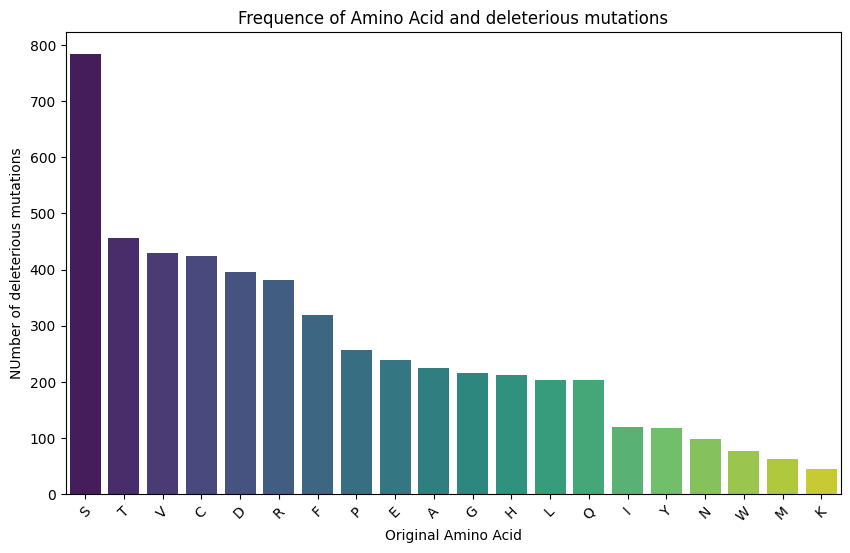

In [51]:
# 3. View the barplot and a pie chart
plt.figure(figsize=(10,6))
sns.barplot(x=aa_counts.index, y=aa_counts.values, palette="viridis")
plt.xlabel("Original Amino Acid")
plt.ylabel("NUmber of deleterious mutations")
plt.title("Frequence of Amino Acid and deleterious mutations")
plt.xticks(rotation=45)
plt.show()

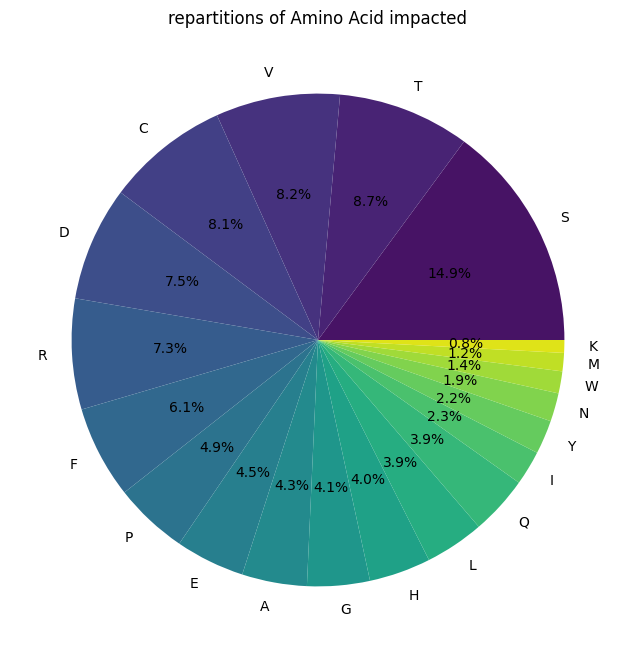

In [53]:
# Plot a pie Chart camembert
plt.figure(figsize=(8,8))
plt.pie(aa_counts, labels=aa_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(aa_counts)))
plt.title("repartitions of Amino Acid impacted")
plt.show()

In [ ]:
"""
Interpretation of the distribution of impacted amino acids (Step 7)

    Amino acid most affected
        The amino acid Serine (S) is the most affected with 14.9% of deleterious mutations.
        This can be explained by its small size and its role in numerous biochemical interactions (e.g. phosphorylation).
        Other frequently mutated amino acids
        Threonine (T) (8.7%), Valine (V) (8.2%), Cysteine (C) (8.1%), and Aspartate (D) (7.5%) are also frequently involved.
        These residues have specific properties:
            T and S: Polar, involved in post-translational modifications.
            V and C: Important for protein structure (e.g. disulfide bridges for cysteine).
            D: Acidic, often involved in enzyme active sites.
              Amino acids less affected
        Lysine (K), Methionine (M), and Tryptophan (W) are rarely involved.
        This may be due to their low frequency in proteins and/or their essential structural role (fewer mutations tolerated).


"""
